# Feature Analysis
Feature analysis visualizers are designed to visualize instances in data space in order to detect features or targets that might impact downstream fitting. Because ML operates on high-dimensional data sets (usually several dozen!), the visualizers focus on aggregation, optimization, and other techniques to give overviews of the data. It is our intent that the steering process will allow the data scientist to zoom and filter and explore the relationships between their instances and between dimensions.

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz
from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import FeatureImportances

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

### Load a dataset

I expect you to be able to fill write the code necessary to load your own dataset. It is not uncommon perform basic wrangling techniques after loading the data, such as dropping columns, changing datatypes, or renaming columns. Include that code here as well.

Lastly, it is very common that datasets are stored as CSV or Excel files, which can be stored in memory as a Pandas Dataframe. Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python programmers and data scientists. Below is are two lines of code that load and print the first five rows of an Excel spreadsheet.

Example:
```python
df = pd.read_excel('filepath/file.xlsx')
df.head()
```

In [4]:
### Load your dataset.
pd.set_option('display.max_columns',500)
df = pd.read_csv("~/wrk/student-outcomes/data/mergeB_for_modeling_features_engineered.csv")
df.head()

,Year,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,ALL_COHORT_,school_name,zip_mailing,zip_location,latitude,urban_centric_locale,county_code,school_level,school_type,lowest_grade_offered,highest_grade_offered,title_i_status,title_i_eligible,charter,magnet,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,enrollment,ungrade_cedp,Math_Pct_Part,Rla_Pct_Part,ALL_RATE_,area_name,rural_urban_continuum_code,urban_influence_code,metro_or_not,civilian_labor_force,unemployment_rate,name_online,name_alliance,name_secondary,name_south,name_miami,name_schools,name_vista,name_urban,name_shs,name_(continuation),name_design,name_learning,name_franklin,name_robert,name_fort,name_prairie,name_lincoln,name_marshall,name_view,name_magnet,name_global,name_east,name_attendance,name_rapids,name_arts,name_ridge,name_special,name_mt.,name_columbia,name_green,name_public,name_comm,name_blue,name_middle/high,name_college,name_lakes,name_liberty,name_community,name_health,name_canyon,name_junior,name_angeles,name_eastern,name_park,name_tech,name_rock,name_hills,name_pleasant,name_wilson,name_hall,name_sr.,name_union,name_independent,name_day,name_(alternative),name_area,name_collegiate,name_county,name_houston,name_math,name_new,name_marion,name_mount,name_international,name_north,name_acad,name_twp,name_middle,name_academic,name_career,name_beach,name_warren,name_point,name_delta,name_center,name_memorial,name_george,name_del,name_jr/sr,name_summit,name_regional,name_thomas,name_city,name_technology,name_york,name_studies,name_prep,name_jshs,name_sciences,name_education,name_performing,name_kennedy,name_independence,name_falls,name_success,name_mountain,name_jefferson,name_mission,name_junior-senior,name_roosevelt,name_grove,name_forest,name_technical,name_northern,name_spring,name_valley,name_hamilton,name_centennial,name_university,name_island,name_hill,name_leadership,name_charter,name_west,name_early,name_alternative,name_harbor,name_king,name_los,name_gateway,name_santa,name_pine,name_engineering,name_jackson,name_preparatory,name_highland,name_sierra,name_st.,name_red,name_junior/senior,name_institute,name_lake,name_pathways,name_grand,name_springs,name_heights,name_ranch,name_virtual,name_charles,name_western,name_creek,name_southwest,name_jr-sr,name_science,name_northeast,name_john,name_co.,name_riverside,name_river,name_oak,name_henry,name_william,name_campus,name_san,name_(the),name_madison,name_central,name_heritage,name_connections,name_harrison,name_port,name_bay,name_continuation,teacher_ratio1,teacher_ratio2,num_grades
0,2012,ALASKA,2,200001,Lower Kuskokwim School District,20000100208,Bethel Regional High School,75,BETHEL REGIONAL HIGH SCHOOL,99559.0,99559.0,60.802584,41.0,2050.0,4.0,1.0,6.0,12.0,5.0,1.0,0.0,0.0,0.0,32.849998,210.0,28.0,238.0,506.0,0.0,97.5,97.5,52.0,"Bethel Census Area, AK",7.0,11.0,0.0,7193.0,15.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.064921,0.438000,6.0
1,2012,ALASKA,2,200001,Lower Kuskokwim School District,20000100318,Bethel Alternative Boarding School,28,BETHEL ALTERNATIVE BOARDING SCHOOL,99559.0,99559.0,60.795960,33.0,2050.0,3.0,4.0,8.0,12.0,5.0,1.0,0.0,0.0,0.0,4.000000,58.0,0.0,58.0,61.0,0.0,90.0,90.0,10.0,"Bethel Census Area, AK",7.0,11.0,0.0,7193.0,15.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.065574,0.142857,4.0
2,2012,ALASKA,2,200006,Mount Edgecumbe High School Agency,20000600558,Mt. Edgecumbe High School,71,MT. EDGECUMB

## Correlations

### Jointplot

Like pairplots, a jointplot shows the distribution between features. It also shows individual distributions of the features being compared.

Example:
```python
sns.jointplot("fare", "age", df)
```

* 1—Regular school
* 2—Special education school
* 3—Vocational school
* 4—Other/alternative school
* 5—Reportable program

/home/bb/miniconda3/envs/my-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


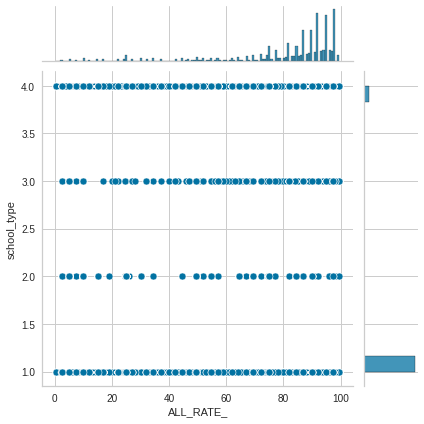

In [5]:
### Create a jointplot
sns.jointplot("ALL_RATE_","school_type",df)

### Scatter Plot Matrices

A scatter plot matrix is a grid of scatter plots, where each feature is plotted against every other feature. This helps you visualize the pairwise relationships between features. Use the Pandas `scatter_matrix()` function to create a scatter matrix from your Pandas Dataframe. For practice, start with a maximum of four features from your dataset. The argument `diagonal` refers to the visualization that populates the diagonal of the matrix. Since the diagonals represent a univariate analysis, it is common for scatter matrix functions to populate it with a histogram.

Example:
```python
subset = df[['feature1','featuer2', 'feature3', 'feature4']]

scatter_matrix(areas, alpha=0.2, diagonal='kde')
```

array([[<AxesSubplot:xlabel='teachers_fte', ylabel='teachers_fte'>,
        <AxesSubplot:xlabel='school_type', ylabel='teachers_fte'>,
        <AxesSubplot:xlabel='ALL_RATE_', ylabel='teachers_fte'>],
       [<AxesSubplot:xlabel='teachers_fte', ylabel='school_type'>,
        <AxesSubplot:xlabel='school_type', ylabel='school_type'>,
        <AxesSubplot:xlabel='ALL_RATE_', ylabel='school_type'>],
       [<AxesSubplot:xlabel='teachers_fte', ylabel='ALL_RATE_'>,
        <AxesSubplot:xlabel='school_type', ylabel='ALL_RATE_'>,
        <AxesSubplot:xlabel='ALL_RATE_', ylabel='ALL_RATE_'>]],
      dtype=object)

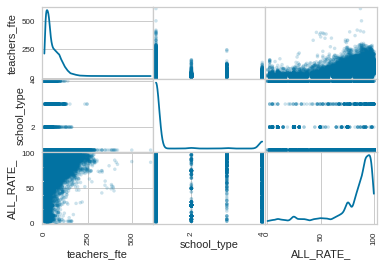

In [6]:
### Create a scatter matrix below.
scatter_matrix(df[['teachers_fte','school_type','ALL_RATE_']],alpha=0.2, diagonal="kde")

### Pairplot

This is the scatter plot matrix from Pandas in Seaborn. Use the `.pairplot()` function to create a scatter matrix for four features in your dataset. In this case, you can pass a target to the `hue` argument.

Example:
```python
g = sns.pairplot(data=df[['feature1', 'feature2', 'feature3', 'feature4']], hue='target')
```

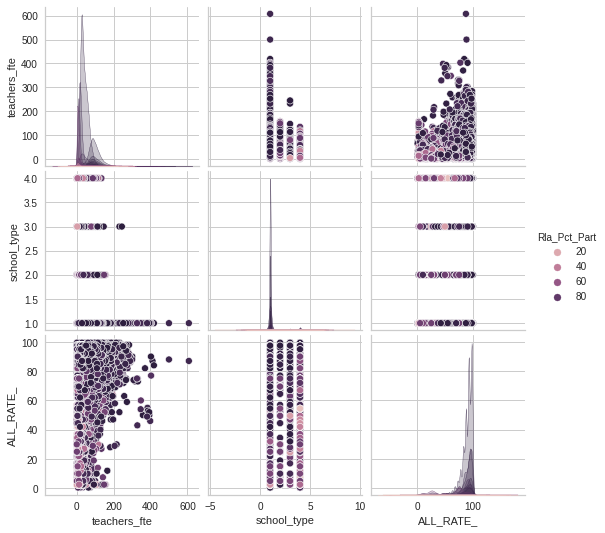

In [7]:
### Write the code for a pairplot below.
sns.pairplot(data=df[['teachers_fte','school_type','ALL_RATE_','Rla_Pct_Part']], hue='Rla_Pct_Part')

### Rank 2D

A two-dimensional ranking of features utilizes a ranking algorithm that takes into account pairs of features at a time (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a feature co-occurence matrix.

By default, the `Rank2D` visualizer utilizes the Pearson correlation score to detect colinear relationships.

Alternatively, we can utilize the covariance ranking algorithm, which attempts to compute the mean value of the product of deviations of variates from their respective means. Covariance loosely attempts to detect a colinear relationship between features. Try substituting `algorithm='covariance'` above to see the difference!

#### Define your features

Let's define the labels for our features that we will pass into the visualizer. Get a list of your features by calling the `.columns()` function on your Pandas Dataframe. If your target is included in the columns, then drop your target first before creating the features list.

Example:
```python
features = df.drop(columns=['target']).columns().tolist()
```

/tmp/ipykernel_187975/354893732.py:66: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.poly = polynomial.fit_transform(df2)
/home/bb/miniconda3/envs/my-env/lib/python3.10/site-packages/feature_engine/encoding/one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/home/bb/miniconda3/envs/my-env/lib/python3.10/site-packages/feature_engine/encoding/one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

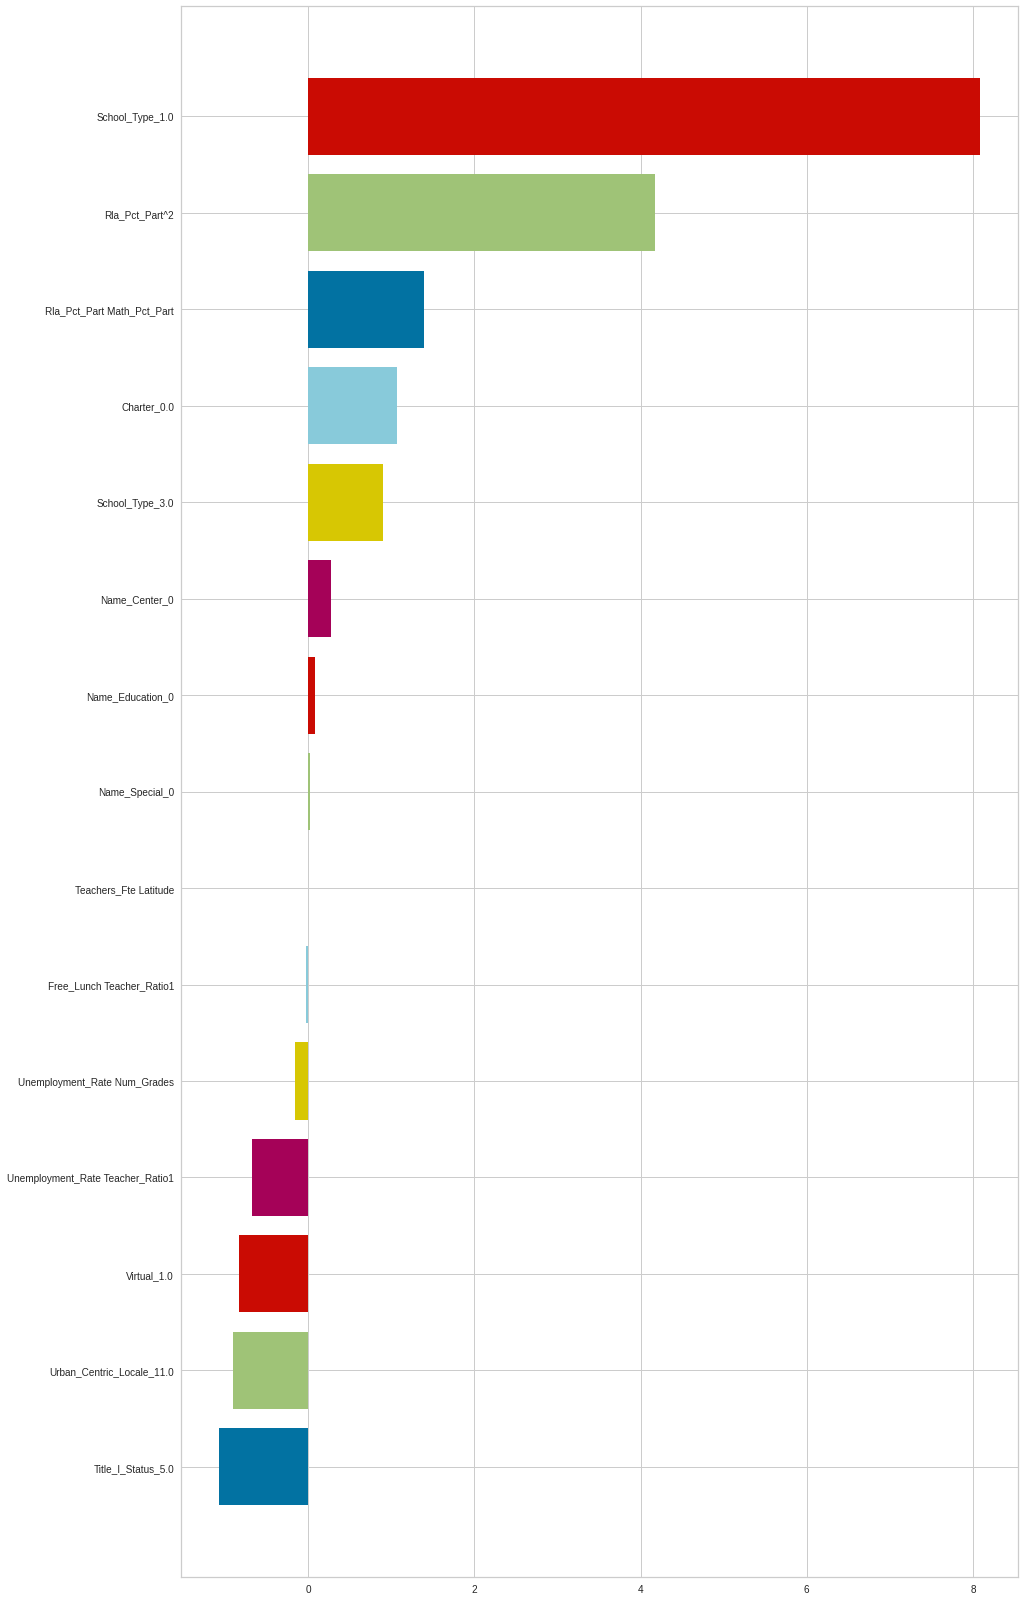

In [9]:
# First, reduce number of features
# OneHot, Polynomial the numeric features, scale numeric features.
# Lasso to reduce features 
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

df2 = df.copy()

df2.drop(
    [
        "STNAM",
        "LEANM",
        "NCESSCH",
        "SCHNAM",
        "school_name",
        "zip_mailing",
        "LEAID",
        "zip_location",
        "county_code",
        "FIPST",
        "area_name",
        "Year",
    ],
    inplace=True,
    axis=1,
)
y = df2.pop('ALL_RATE_')

# Tag categoricals so that they can be treated properly by the modeling packages
numeric_cols = [
    "Rla_Pct_Part",
    "Math_Pct_Part",
    "enrollment",
    "free_lunch",
    "reduced_price_lunch",
    "free_or_reduced_price_lunch",
    "teachers_fte",
    "lowest_grade_offered",
    "highest_grade_offered",
    "latitude",
    "ALL_COHORT_",
    "civilian_labor_force",
    "unemployment_rate",
    "teacher_ratio1",
    "teacher_ratio2",
    "num_grades",
]

for col in numeric_cols:
    assert col in df2.columns
categoricals = list(set(df2.columns.tolist()) - set(numeric_cols))

# Convert categoricals to the pandas type 'category'
for col in categoricals:
    df2[col] = df2[col].astype("category")

polynomial = SklearnTransformerWrapper(transformer=PolynomialFeatures(degree=2), variables=numeric_cols)
onehotter = OneHotEncoder(drop_last=True, variables=categoricals)

df2.poly = polynomial.fit_transform(df2)
df2.onehot = onehotter.fit_transform(df2.poly)
scaler = SklearnTransformerWrapper(transformer=StandardScaler(), variables=df2.onehot.select_dtypes(include=np.number).columns.tolist())
df2.scaled = scaler.fit_transform(df2.onehot)


# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), df2.scaled.columns.tolist()))
viz = FeatureImportances(Lasso(), labels=labels, relative=False,size=(1080,2080),topn=15)
# Fit and show the feature importances
viz.fit(df2.scaled, y)
viz.fig.savefig("Lasso_Feature_Importances_DatasetB.png")

In [ ]:
### Create a list of your features.
# feature = 

#### Create the visualization

First, we will instantiate the Rank2D visualizer, passing in the labels for our features. In one line, we fit the data by passing in our data. Then we will transform our data using the fitted parameters. Lastly, we will show the visualization.

Example:
```python0
visualizer = Rank2D(algorithm='pearson', features=features, size=(1080, 720))
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()
```

In [ ]:
# Create the visualization.
Rank2D.set_params
visualizer = Rank2D(algorithm='pearson',features=df.select_dtypes(np.number).columns.tolist(), size=(1080,720))
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.transform(df.select_dtypes(include=np.number))
for label in visualizer.ax.texts:
    label.set_size(4)


## Separability

### Radviz (Classification Only)

`RadViz` is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization.


#### Define your classes (target)

In order for this visualization to work, you must pass a numeric representation of your target. For example, if your targets are binary, say, "unoccupid" and an "occupid" apartment, then those targets would need to be converted to "0" and "1" or "1" and "2".

Example:
```python
le = preprocessing.LabelEncoder()
le.fit(df['target'])
target = le.transform(df['class'])
```

In [ ]:
### Define a variable with your classes

#### Define your features

You must pass to the visualization the labels for your features. Get a list of your features by calling the `.columns()` function on your Pandas Dataframe. If your target is included in the columns, then drop your target first before creating the features list.

Example:
```python
features = df.drop(columns=['target']).columns().tolist()
```

In [ ]:
### Create a variable with your feature labels.

#### Create the visualization

First, we will instantiate the Radviz visualizer, passing in the labels for our classes, the features, and a size argument. The next two lines of data fit your data you the visualizer, transform your data on the fitted parameters, and finally showing the visualization.

Example:
```python
visualizer = RadViz(classes=le.classes_, features=features, size=(1080, 720))
visualizer.fit(df[features], target)
visualizer.transform(df[features])
visualizer.show()
```

Data scientists use this method to detect separability between classes. Is there an opportunity to learn from the feature set or is there just too much noise?

In [ ]:
# Create the visualization.

Now, let's re-create the visualization after reordering the features. To reorder columns in your Dataframe, pass a list of your columns in a different order than they already are in. For example, using `np.random.shuffle(features)` will shuffle the column labels.

Example:
```python
np.random.shuffle(features)
df = df[features]
```

In [ ]:
# Reorder your features in your dataset.

Using the same steps as above, re-create the visualization.

In [ ]:
# Recreate the visualization with reordered features.

### Parallel Coordinates (Classification Only)

Parallel coordinates is multi-dimensional feature visualization technique where the vertical axis is duplicated horizontally for each feature. Instances are displayed as a single line segment drawn from each vertical axes to the location representing their value for that feature. This allows many dimensions to be visualized at once; in fact given infinite horizontal space (e.g. a scrolling window), technically an infinite number of dimensions can be displayed!

Data scientists use this method to detect clusters of instances that have similar classes, and to note features that have high variance or different distributions.

By inspecting the visualization closely, we can see that the combination of transparency and overlap gives us the sense of groups of similar instances, sometimes referred to as "braids". If there are distinct braids of different classes, it suggests that there is enough separability that a classification algorithm might be able to discern between each class.

#### Create the visualization

Instantiate the ParallelCoordinate visualizer, passing in the labels for our classes and the features. The arguement `sample` in the example below is important, as it limits the amount of data visualized. The argument `shuffle` ensures that the selected data is drawn randomly. The first, transform, show, are similar to those you've already seen.

Example:
```python
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(1080, 720)
)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()
```

In [ ]:
### Create the visualization

However, the domain of each feature may make the visualization hard to interpret. To solve this problem, each feature should be scaled or normalized so they are approximately in the same domain.

Normalization techniques can be directly applied to the visualizer without pre-transforming the data (though you could also do this) by using the `normalize` parameter. Try using `minmax`, `minabs`, `standard`, `l1`, or `l2` normalization above to change perspectives!

Example:
```python
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', # This time we'll specify a normalizer
    sample=0.05, shuffle=True, size=(1080, 720)
)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()
```

In [ ]:
### Recreate the visualization by transforming the data.

### Linear Regressions

Linear regressions are a popular method for assessing coorelation between two variables. For a tutorial see [here](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html).

Use the Seaborn `.regplot()` function to run a regression on two variables.

Example:
```python
sns.regplot(data=df, y='target', x='feature')
```

In [ ]:
### Create a linear regression plot below.

### Feature Importances
The feature engineering process involves selecting the minimum required features to produce a valid model because the more features a model contains, the more complex it is (and the more sparse the data), therefore the more sensitive the model is to errors due to variance. A common approach to eliminating features is to describe their relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if the model fairs better during cross-validation.

Many model forms describe the underlying impact of features relative to each other. In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a `feature_importances_` attribute when fitted. The Yellowbrick `FeatureImportances` visualizer utilizes this attribute to rank and plot relative importances.

#### Choose a machine learning model

To make things simple, we will begin with a Random Forest model. If you have a continuous target, use the Random Forest Regression. If you have a discrete target, then use the Random Forest Classifier.

Example:
```python
model = RandomForestClassifier()
```

In [ ]:
### Instantiate a random forest model.

#### Create the visualization

To use the `FeatureImportance` visualization, pass in the model you've created and pass in the labels for your features. The next steps are to fit the data to the model with `.fit(X, y)` and then `.show()` to display the results.

With discrete targets, features are plotted against their *relative importance*, that is the percent importance of the most important feature. The visualizer also contains `features_` and `feature_importances_` attributes to get the ranked numeric values. For models that do not support a `feature_importances_` attribute, the `FeatureImportances` visualizer will also draw a bar plot for the `coef_` attribute that many linear models provide.

When using a model with a `coef_` attribute, it is better to set `relative=False` to draw the true magnitude of the coefficient (which may be negative). We can also specify our own set of labels if the dataset does not have column names or to print better titles.

Example:
```python
viz = FeatureImportances(model, labels=features, size=(1080, 720))
viz.fit(X, y)
viz.show()
```

In [ ]:
### Create the feature importance visualization.